In [ ]:
# End time
T = 1
# number of steps
M = 50

# step_size
dt = T/M

# interest rate
r = 0.06

# stock Price
S = 100

# strike Price
E = 99
sigma = .2
M = 50

# 
a = np.exp(r*dt)

# up
u = np.exp(sigma*np.sqrt(dt))

# down
d = 1/u

# probability
p = (a - d) / (u - d)



In [177]:
# data matrix
data_dict = {}

T = 1
dt = T/M
r = 0.06
S = 100
E = 99
sigma = .2

M = 50    

a = np.exp(r*dt)
u = np.exp(sigma*np.sqrt(dt))
d = 1/u
p = (a - d) / (u - d)

W = np.zeros((M+1,1))

# asset price at time T
for n in range(0,M+1):
    W[n] = S*(u**(M-n))*(d**(n));

# option values at time T
for n in range(0,M+1):
    W[n] = max(W[n] - E,0)

# retrace to get option value at time zero
for i in range(M,0,-1):
    for n in range(0,i):
        W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])


print('Option value: ' +str(W[0][0]))
# print(data_dict)

[0.67255696]
Option value: 11.546434850755071


In [178]:
# data matrix
data_dict = {}
W = np.zeros((M+1,1))
M = 50

for sigma in [0.1,0.15,0.2,0.25,0.3]:
    
    a = np.exp(r*dt)
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (a - d) / (u - d)
    
    # asset price at time T
    for n in range(0,M+1):
        W[n] = S*(u**(M-n))*(d**(n));
    
    # option values at time T
    for n in range(0,M+1):
        W[n] = max(W[n] - E,0)
    
    # retrace to get option value at time zero
    for i in range(M,0,-1):
        for n in range(0,i):
            W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])
        if i == 2:
            # W[0] = W[n]
            # W[1] = W[n+1]

            f_up = W[0]
            f_down = W[1]
            S_up = S*u
            S_down = S*d
            
            delta = (f_up-f_down)/(S_up-S_down)
            print(delta)
        
    
    data_dict[sigma] =  {"option_value" : W[0][0]}
    

    print('Option value for sigma='+str(sigma)+': '+str(W[0][0]))
# print(data_dict)

[0.7712584]
Option value for sigma=0.1: 8.14987435697091
[0.70447916]
Option value for sigma=0.15: 9.783050411398213
[0.67255696]
Option value for sigma=0.2: 11.546434850755071
[0.6564095]
Option value for sigma=0.25: 13.361930189752332
[0.64854922]
Option value for sigma=0.3: 15.20066321639792


In [172]:
import time
import matplotlib.pyplot as plt
# End time
T = 1
# number of steps
M = 50

# step_size
dt = T/M

# interest rate
r = 0.06

# stock Price
S = 100

# strike Price
E = 99
sigma = .2


durations = []
Ms = [50,100,200,400,800,1600]
for M in Ms:
    start = time.time()
    dt = T/M
    a = np.exp(r*dt)
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (a - d) / (u - d)
    
    W = np.zeros((M+1,1))

    # asset price at time T
    for n in range(0,M+1):
        W[n] = S*(u**(M-n))*(d**(n));
    
    # option values at time T
    for n in range(0,M+1):
        W[n] = max(W[n] - E,0)
    
    # retrace to get option value at time zero
    for i in range(M,0,-1):
        for n in range(0,i):
            W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])
    end = time.time()
    duration = end - start
    durations.append(duration)

#     print('duration for M='+str(M)+': '+str(duration))
    


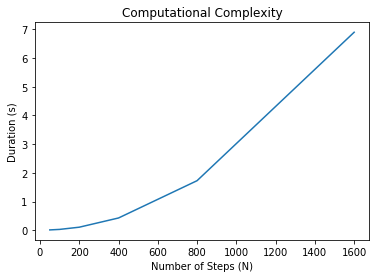

In [173]:
plt.plot(Ms,durations)
plt.xlabel('Number of Steps (N)')
plt.ylabel('Duration (s)')
plt.title('Computational Complexity')
plt.show()

In [212]:
import time
import matplotlib.pyplot as plt
# End time
T = 1
# number of steps
M = 50
# step_size
dt = T/M
# interest rate
r = 0.06
# stock Price
S = 100
# strike Price
E = 99
sigma = .2

start = time.time()
dt = T/M
a = np.exp(r*dt)
u = np.exp(sigma*np.sqrt(dt))
d = 1/u
p = (a - d) / (u - d)

W = np.zeros((M+1,1))

# asset price at time T
for n in range(0,M+1):
    W[n] = S*(u**(M-n))*(d**(n));

# option values at time T
for n in range(0,M+1):
    W[n] = max(W[n] - E,0)

# retrace to get option value at time zero
for i in range(M,0,-1):
    for n in range(0,i):
        W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])
#         print(i-n-1)
        W[n] = np.max(S*u**(i-n-1)*d**(n)-E, W[n])
#         print(exercise_price)
print(W[0][0])        

TypeError: only integer scalar arrays can be converted to a scalar index